In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#read jsonl file
df = pd.read_json('./data/metadata.jsonl', lines=True)
df.head()

,file_name,text_prompt
0,train/sample_0.png,Low masking level
1,train/sample_1.png,Low masking level
2,train/sample_2.png,Low masking level
3,train/sample_3.png,Low masking level
4,train/sample_4.png,Low masking level


In [13]:
#convert text prompt to 0,1,2 instead of Low, Medium, High respectively
df['text_prompt'] = df['text_prompt'].map({'Low masking level': 0, 'Medium masking level': 1, 'High masking level': 2})

df.head()

,file_name,text_prompt
0,train/sample_0.png,0
1,train/sample_1.png,0
2,train/sample_2.png,0
3,train/sample_3.png,0
4,train/sample_4.png,0


In [14]:
from tensorflow import keras
from tensorflow.keras import layers


In [15]:
inputs = keras.Input(shape=(320,256,1)) #resolution of images
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x) #3 classes
model = keras.Model(inputs=inputs, outputs=outputs)


In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 320, 256, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 318, 254, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 159, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 157, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 78, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 76, 60, 128)       7385

In [17]:
#load png files
from PIL import Image
import numpy as np

images = []
for i in range(99999):
    img = Image.open('./data/train/sample_'+str(i)+'.png')
    img = img.resize((256,320)) #half image size
    img = img.convert('L') #convert to grayscale
    img = np.array(img)
    images.append(img)


In [18]:
import matplotlib.pyplot as plt

(320, 256)


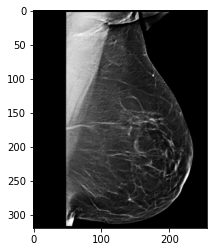

In [19]:
print(images[0].shape)
#are the images loaded correctly?
plt.imshow(images[0], cmap='gray')

In [20]:
labels = []
#read labels from jsonl file
for i in range(99999):
    labels.append(df['text_prompt'][i])

In [21]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
import sklearn

In [23]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [24]:
#split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [25]:
#train model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#train model
model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=64, validation_data=(np.array(X_val), np.array(y_val)))

Epoch 1/5


938/938 [==============================] - 1459s 2s/step - loss: 1.2959 - accuracy: 0.9684 - val_loss: 0.0612 - val_accuracy: 0.9816
Epoch 2/5
938/938 [==============================] - 1497s 2s/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0394 - val_accuracy: 0.9901
Epoch 3/5
938/938 [==============================] - 1496s 2s/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0960 - val_accuracy: 0.9808
Epoch 4/5
938/938 [==============================] - 1452s 2s/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0439 - val_accuracy: 0.9882
Epoch 5/5
938/938 [==============================] - 1401s 1s/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.1460 - val_accuracy: 0.9729


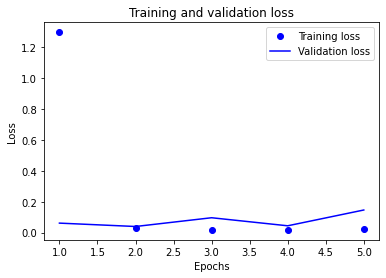

In [27]:
#show graph of training loss and validation loss
history_dict = model.history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

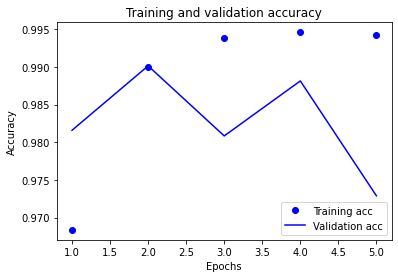

In [28]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
#evaluate model
results = model.evaluate(np.array(X_test), np.array(y_test))
results





625/625 [==============================] - 95s 151ms/step - loss: 0.1369 - accuracy: 0.9729


[0.1368844360113144, 0.9728999733924866]